In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the csv
data = pd.read_csv("fifa21_male2.csv")
data

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [3]:
data.columns

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)

In [4]:
# first I like to standardize the columns
df1 = data.columns = [column.lower().replace(' ', '_') for column in data.columns]
df1

['id',
 'name',
 'age',
 'ova',
 'nationality',
 'club',
 'bov',
 'bp',
 'position',
 'player_photo',
 'club_logo',
 'flag_photo',
 'pot',
 'team_&_contract',
 'height',
 'weight',
 'foot',
 'growth',
 'joined',
 'loan_date_end',
 'value',
 'wage',
 'release_clause',
 'contract',
 'attacking',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'movement',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'power',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'goalkeeping',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'total_stats',
 'base_stats',
 'w/f',
 'sm',
 'a/w',
 'd/w',
 'ir',
 'pac',
 'sho',
 'pas',
 'dri',
 'def',
 'phy',
 

In [5]:
#Drop columns we're not gonna use
df1 = data.drop(columns={'player_photo','club_logo', 'name', 'position', 'flag_photo', 'team_&_contract', 'growth', 'pot', 'bov', 'joined', 'loan_date_end', 'release_clause', 'contract', 'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender', 'nationality', 'a/w', 'd/w', 'w/f', 'sm', 'ir', 'wage', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'total_stats', 'base_stats', 'height', 'weight', 'foot', 'jumping', 'stamina', 'ova', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits'})
df1

,id,age,club,bp,value,attacking,crossing,finishing,heading_accuracy,short_passing,...,power,shot_power,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties
0,2,33,Udinese,LWB,€625K,313,75,50,59,71,...,347,74,68,68,320,72,69.0,63.0,66.0,50
1,16,37,KAS Eupen,CM,€600K,337,68,64,61,76,...,324,75,60,71,362,71,71.0,72.0,73.0,75
2,27,33,Coventry City,CAM,€1.1M,337,80,64,41,77,...,284,72,56,69,317,69,39.0,69.0,74.0,66
3,36,36,Sunderland,ST,€0,264,54,70,60,80,...,239,63,66,59,271,59,70.0,72.0,NaN,70
4,41,36,Vissel Kobe,CAM,€5.5M,367,75,69,54,90,...,297,67,62,70,370,58,70.0,78.0,93.0,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,22,CD Tondela,CB,€550K,197,35,23,66,47,...,279,48,74,28,218,69,58.0,23.0,29.0,39
17121,259090,18,Burnley,CAM,€130K,248,50,43,50,64,...,271,51,57,48,259,51,50.0,55.0,53.0,50
17122,259091,18,Burnley,RB,€130K,218,55,34,53,42,...,233,28,54,37,256,58,55.0,49.0,45.0,49
17123,259101,20,SK Sturm Graz,RB,€475K,223,62,26,52,60,...,261,51,48,33,257,61,58.0,46.0,56.0,36


In [6]:
df1.columns

Index(['id', 'age', 'club', 'bp', 'value', 'attacking', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill',
       'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control',
       'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'power', 'shot_power', 'strength', 'long_shots', 'mentality',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties'],
      dtype='object')

In [7]:
df1 = df1.set_index('id')
df1

,age,club,bp,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,...,power,shot_power,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties
id,,,,,,,,,,,,,,,,,,,,,
2,33,Udinese,LWB,€625K,313,75,50,59,71,58.0,...,347,74,68,68,320,72,69.0,63.0,66.0,50
16,37,KAS Eupen,CM,€600K,337,68,64,61,76,68.0,...,324,75,60,71,362,71,71.0,72.0,73.0,75
27,33,Coventry City,CAM,€1.1M,337,80,64,41,77,75.0,...,284,72,56,69,317,69,39.0,69.0,74.0,66
36,36,Sunderland,ST,€0,264,54,70,60,80,NaN,...,239,63,66,59,271,59,70.0,72.0,NaN,70
41,36,Vissel Kobe,CAM,€5.5M,367,75,69,54,90,79.0,...,297,67,62,70,370,58,70.0,78.0,93.0,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,22,CD Tondela,CB,€550K,197,35,23,66,47,26.0,...,279,48,74,28,218,69,58.0,23.0,29.0,39
259090,18,Burnley,CAM,€130K,248,50,43,50,64,41.0,...,271,51,57,48,259,51,50.0,55.0,53.0,50
259091,18,Burnley,RB,€130K,218,55,34,53,42,34.0,...,233,28,54,37,256,58,55.0,49.0,45.0,49


In [8]:
df1.isna().sum()

age                  0
club                23
bp                   0
value                0
attacking            0
crossing             0
finishing            0
heading_accuracy     0
short_passing        0
volleys             58
skill                0
dribbling            0
curve               58
fk_accuracy          0
long_passing         0
ball_control         0
movement             0
acceleration         0
sprint_speed         0
agility             58
reactions            0
balance             58
power                0
shot_power           0
strength             0
long_shots           0
mentality            0
aggression           0
interceptions        7
positioning          7
vision              58
penalties            0
dtype: int64

In [9]:
df2 =df1.copy()
df2= df1.dropna()
df2

,age,club,bp,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,...,power,shot_power,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties
id,,,,,,,,,,,,,,,,,,,,,
2,33,Udinese,LWB,€625K,313,75,50,59,71,58.0,...,347,74,68,68,320,72,69.0,63.0,66.0,50
16,37,KAS Eupen,CM,€600K,337,68,64,61,76,68.0,...,324,75,60,71,362,71,71.0,72.0,73.0,75
27,33,Coventry City,CAM,€1.1M,337,80,64,41,77,75.0,...,284,72,56,69,317,69,39.0,69.0,74.0,66
41,36,Vissel Kobe,CAM,€5.5M,367,75,69,54,90,79.0,...,297,67,62,70,370,58,70.0,78.0,93.0,71
61,27,Alemannia Aachen,RW,€725K,271,61,53,42,58,57.0,...,315,71,61,49,256,63,26.0,63.0,58.0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,22,CD Tondela,CB,€550K,197,35,23,66,47,26.0,...,279,48,74,28,218,69,58.0,23.0,29.0,39
259090,18,Burnley,CAM,€130K,248,50,43,50,64,41.0,...,271,51,57,48,259,51,50.0,55.0,53.0,50
259091,18,Burnley,RB,€130K,218,55,34,53,42,34.0,...,233,28,54,37,256,58,55.0,49.0,45.0,49


In [10]:
df2.dtypes

age                   int64
club                 object
bp                   object
value                object
attacking             int64
crossing              int64
finishing             int64
heading_accuracy      int64
short_passing         int64
volleys             float64
skill                 int64
dribbling             int64
curve               float64
fk_accuracy           int64
long_passing          int64
ball_control          int64
movement              int64
acceleration          int64
sprint_speed          int64
agility             float64
reactions             int64
balance             float64
power                 int64
shot_power            int64
strength              int64
long_shots            int64
mentality             int64
aggression            int64
interceptions       float64
positioning         float64
vision              float64
penalties             int64
dtype: object

In [11]:
df3 = df2.copy()

def func(value):
    
    x = value.replace('€', '')
    
    if 'M' in x:
        return int(float(x.replace('M', ''))*1000000)
    elif 'K' in x:
        return int(x.replace('K', '000'))
    else:
        return x
df3['value'] = df3['value'].apply(func)
df3

,age,club,bp,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,...,power,shot_power,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties
id,,,,,,,,,,,,,,,,,,,,,
2,33,Udinese,LWB,625000,313,75,50,59,71,58.0,...,347,74,68,68,320,72,69.0,63.0,66.0,50
16,37,KAS Eupen,CM,600000,337,68,64,61,76,68.0,...,324,75,60,71,362,71,71.0,72.0,73.0,75
27,33,Coventry City,CAM,1100000,337,80,64,41,77,75.0,...,284,72,56,69,317,69,39.0,69.0,74.0,66
41,36,Vissel Kobe,CAM,5500000,367,75,69,54,90,79.0,...,297,67,62,70,370,58,70.0,78.0,93.0,71
61,27,Alemannia Aachen,RW,725000,271,61,53,42,58,57.0,...,315,71,61,49,256,63,26.0,63.0,58.0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,22,CD Tondela,CB,550000,197,35,23,66,47,26.0,...,279,48,74,28,218,69,58.0,23.0,29.0,39
259090,18,Burnley,CAM,130000,248,50,43,50,64,41.0,...,271,51,57,48,259,51,50.0,55.0,53.0,50
259091,18,Burnley,RB,130000,218,55,34,53,42,34.0,...,233,28,54,37,256,58,55.0,49.0,45.0,49


In [12]:
df3['value'] = df3['value'].apply(lambda x: float(str(x)))

In [13]:
df3['bp'].value_counts()

CB     3240
ST     2641
CAM    2241
GK     1569
RM     1398
CDM    1246
CM      985
LB      920
RB      892
LM      804
RW      329
LWB     252
RWB     250
LW      208
CF       74
Name: bp, dtype: int64

In [14]:
df3.describe()

,age,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,...,power,shot_power,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties
count,17049.000000,1.704900e+04,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,...,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000
mean,25.252156,2.578822e+06,258.628307,51.605959,47.939879,53.576984,60.503197,45.002288,266.704147,57.839580,...,302.617749,59.707314,65.307819,49.121239,261.992551,56.982697,47.035955,52.331456,55.444366,50.198076
std,4.928935,5.381843e+06,72.250095,17.867905,19.378506,16.924029,13.940828,17.722261,76.824338,18.042217,...,49.264325,13.391686,12.618664,19.033539,62.822163,17.016040,20.826470,19.076496,13.723110,15.654065
min,16.000000,0.000000e+00,42.000000,6.000000,3.000000,5.000000,7.000000,4.000000,43.000000,5.000000,...,128.000000,12.000000,16.000000,4.000000,50.000000,9.000000,4.000000,2.000000,10.000000,7.000000
25%,21.000000,3.750000e+05,232.000000,41.000000,33.000000,46.000000,56.000000,32.000000,232.000000,53.000000,...,272.000000,50.000000,58.000000,35.000000,235.000000,45.000000,26.000000,43.000000,47.000000,40.000000
50%,25.000000,8.000000e+05,271.000000,56.000000,52.000000,57.000000,63.000000,46.000000,279.000000,63.000000,...,308.000000,61.000000,67.000000,53.000000,270.000000,60.000000,53.000000,57.000000,57.000000,51.000000
75%,29.000000,2.400000e+06,306.000000,65.000000,64.000000,65.000000,69.000000,59.000000,319.000000,70.000000,...,339.000000,70.000000,74.000000,64.000000,304.000000,70.000000,65.000000,66.000000,65.000000,62.000000
max,53.000000,1.055000e+08,437.000000,94.000000,95.000000,93.000000,94.000000,90.000000,470.000000,96.000000,...,444.000000,95.000000,97.000000,94.000000,421.000000,96.000000,93.000000,95.000000,95.000000,94.000000


In [15]:
df3.select_dtypes(np.number)

,age,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,...,power,shot_power,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties
id,,,,,,,,,,,,,,,,,,,,,
2,33,625000.0,313,75,50,59,71,58.0,338,73,...,347,74,68,68,320,72,69.0,63.0,66.0,50
16,37,600000.0,337,68,64,61,76,68.0,369,69,...,324,75,60,71,362,71,71.0,72.0,73.0,75
27,33,1100000.0,337,80,64,41,77,75.0,387,79,...,284,72,56,69,317,69,39.0,69.0,74.0,66
41,36,5500000.0,367,75,69,54,90,79.0,408,85,...,297,67,62,70,370,58,70.0,78.0,93.0,71
61,27,725000.0,271,61,53,42,58,57.0,276,67,...,315,71,61,49,256,63,26.0,63.0,58.0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,22,550000.0,197,35,23,66,47,26.0,193,44,...,279,48,74,28,218,69,58.0,23.0,29.0,39
259090,18,130000.0,248,50,43,50,64,41.0,264,57,...,271,51,57,48,259,51,50.0,55.0,53.0,50
259091,18,130000.0,218,55,34,53,42,34.0,212,52,...,233,28,54,37,256,58,55.0,49.0,45.0,49


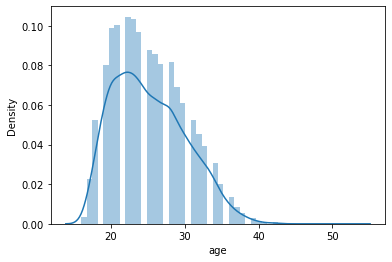

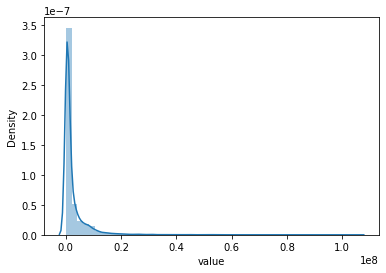

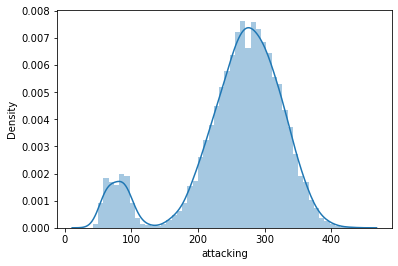

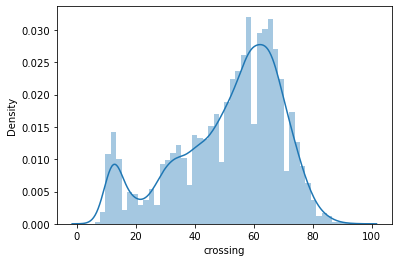

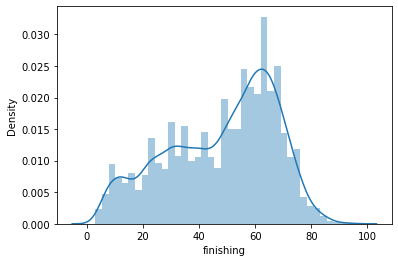

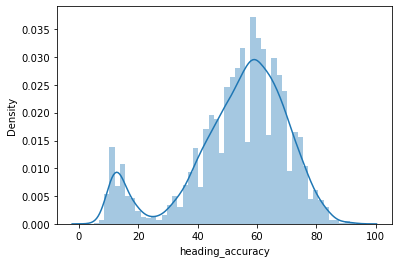

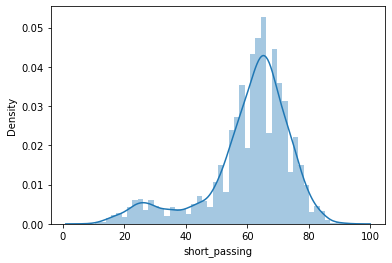

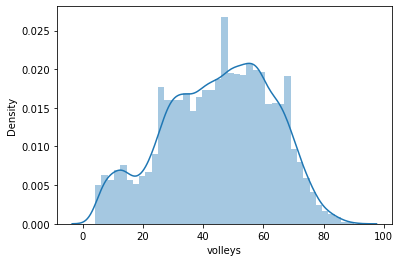

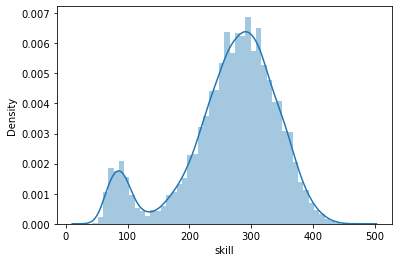

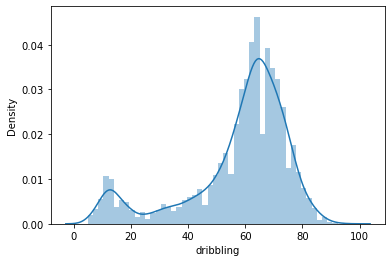

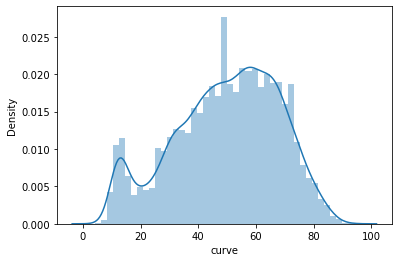

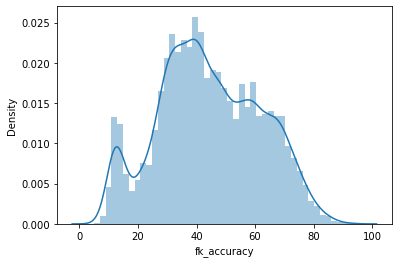

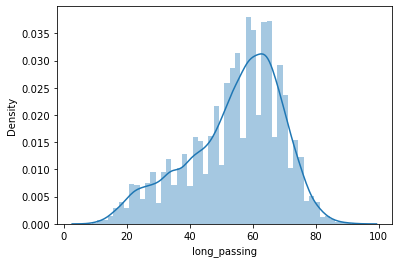

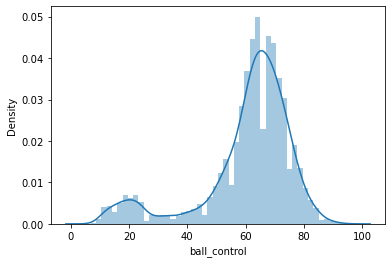

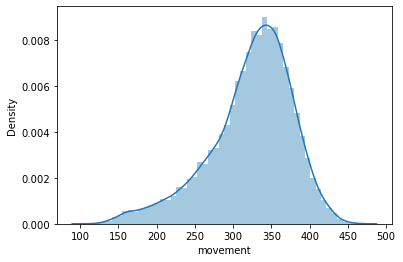

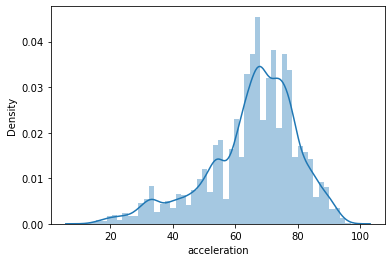

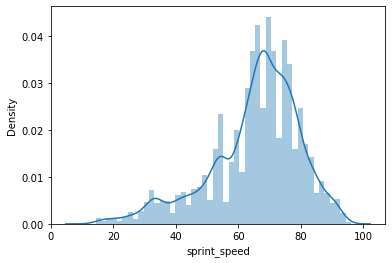

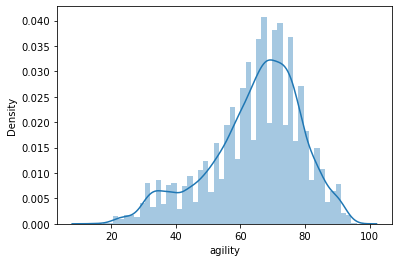

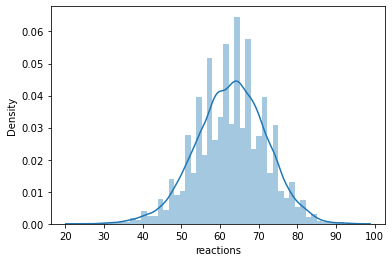

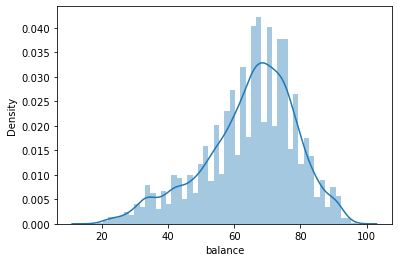

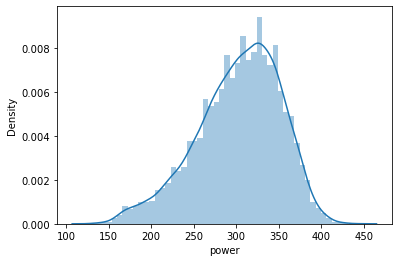

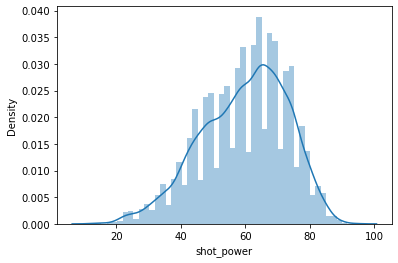

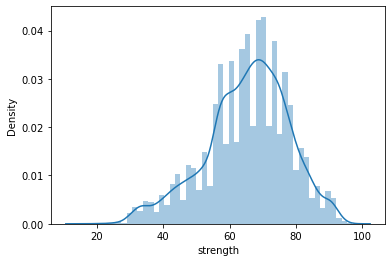

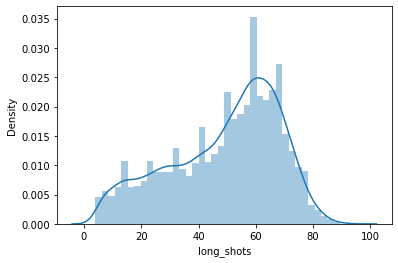

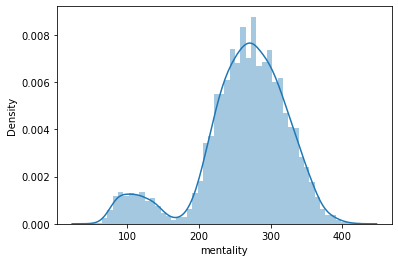

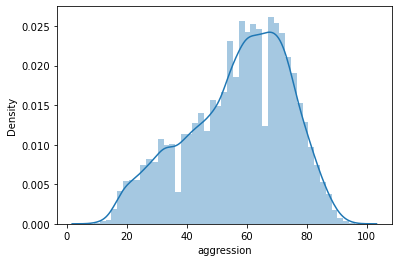

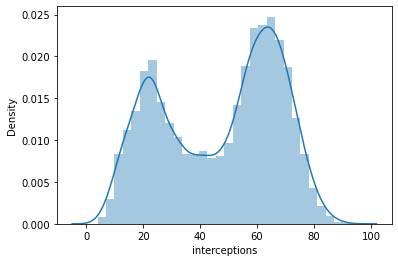

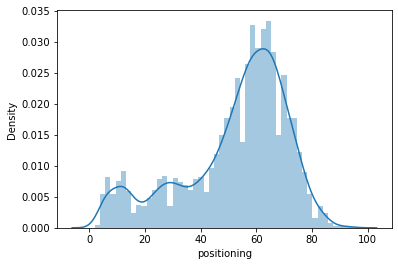

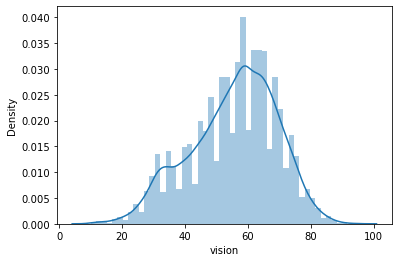

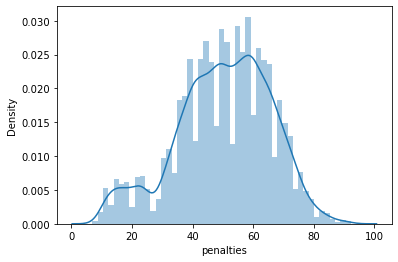

In [16]:
for column in df3.select_dtypes(np.number).columns:
    sns.distplot(df3[column])
    plt.show()

In [17]:
#delete GK

df4 = df3[df3['bp'] != 'GK']
df4.bp.value_counts()

CB     3240
ST     2641
CAM    2241
RM     1398
CDM    1246
CM      985
LB      920
RB      892
LM      804
RW      329
LWB     252
RWB     250
LW      208
CF       74
Name: bp, dtype: int64

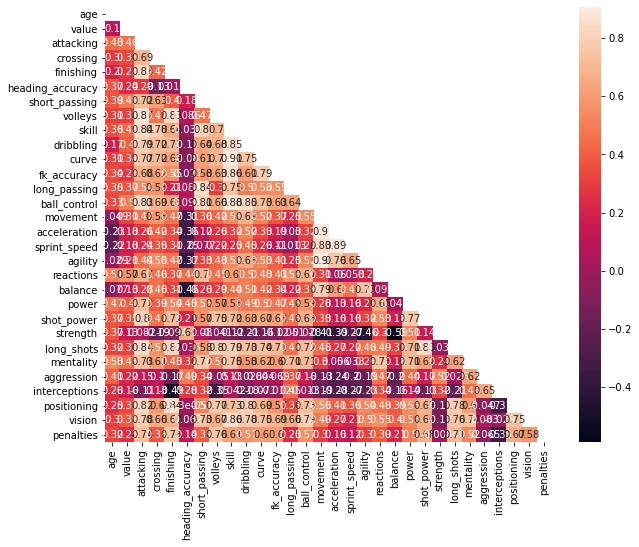

In [19]:
mask = np.zeros_like(df4.corr())

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df4.corr(), mask=mask, annot=True)
plt.show()

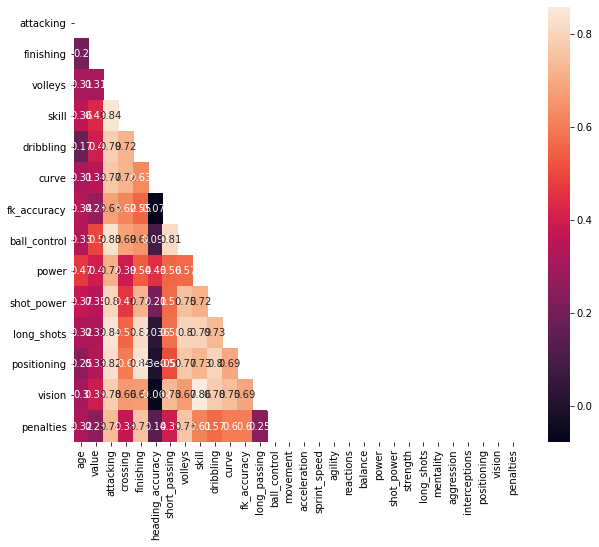

In [20]:
df5 = df4.corr()
df6 = df5[df5['finishing'] > 0.5]

mask = np.zeros_like(df6)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df6, mask=mask, annot=True)
plt.show()

In [21]:
df5 = df4.corr()
df6 = df5[df5['finishing'] > 0.5]['finishing']
df6.sort_values(ascending=False)

finishing       1.000000
positioning     0.837666
volleys         0.831623
attacking       0.830118
long_shots      0.818139
penalties       0.756388
shot_power      0.718855
dribbling       0.710931
vision          0.668225
ball_control    0.648864
skill           0.644902
curve           0.628196
fk_accuracy     0.554416
power           0.536790
Name: finishing, dtype: float64

In [22]:
df7 = df4[df6.index]

In [23]:
df7

,attacking,finishing,volleys,skill,dribbling,curve,fk_accuracy,ball_control,power,shot_power,long_shots,positioning,vision,penalties
id,,,,,,,,,,,,,,
2,313,50,58.0,338,73,65.0,60,71,347,74,68,63.0,66.0,50
16,337,64,68.0,369,69,79.0,79,71,324,75,71,72.0,73.0,75
27,337,64,75.0,387,79,84.0,77,78,284,72,69,69.0,74.0,66
41,367,69,79.0,408,85,80.0,70,90,297,67,70,78.0,93.0,71
61,271,53,57.0,276,67,61.0,42,62,315,71,49,63.0,58.0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,197,23,26.0,193,44,26.0,33,56,279,48,28,23.0,29.0,39
259090,248,43,41.0,264,57,42.0,50,54,271,51,48,55.0,53.0,50
259091,218,34,34.0,212,52,43.0,34,47,233,28,37,49.0,45.0,49


In [24]:
# CHECK POINT. If I reduce or increase the threshold of correlatiion values, I'll pick more or less columns, which will help my model improve.

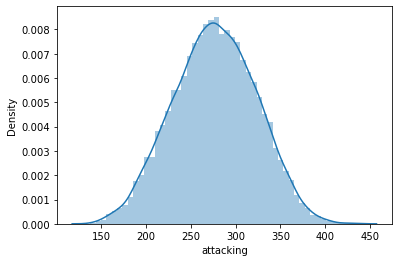

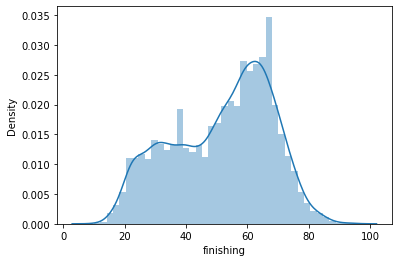

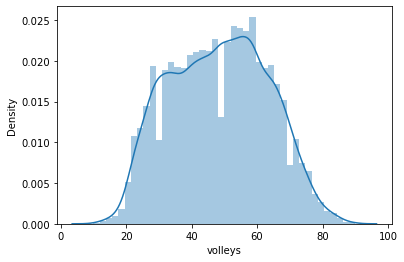

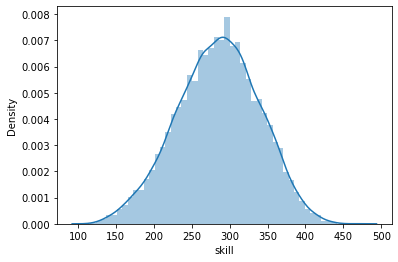

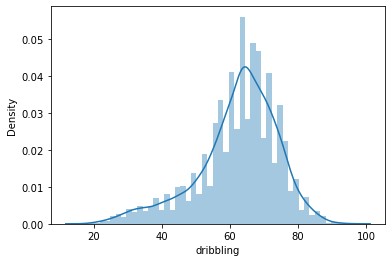

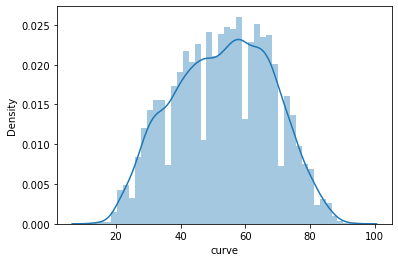

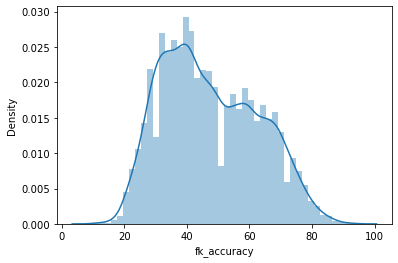

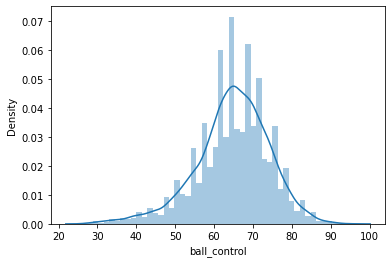

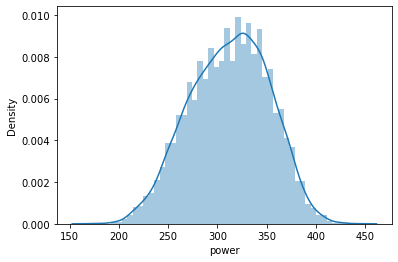

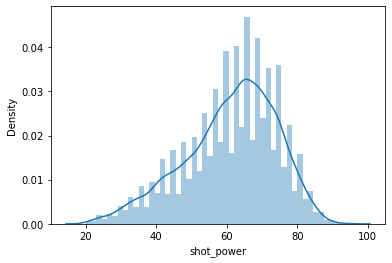

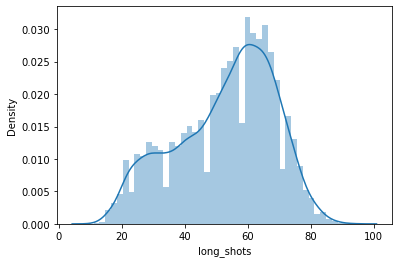

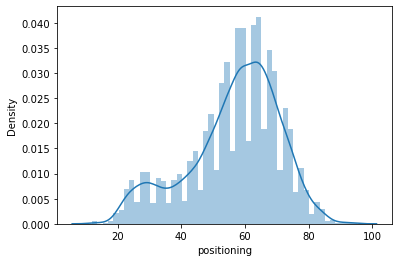

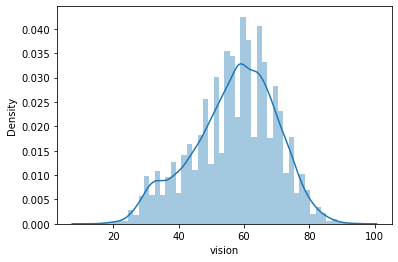

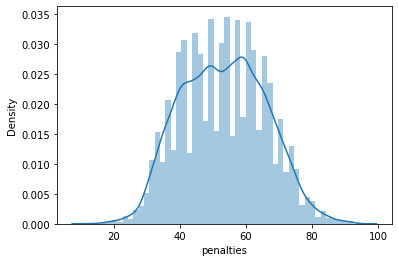

In [25]:
for column in df7.select_dtypes(np.number).columns:
    sns.distplot(df7[column])
    plt.show()

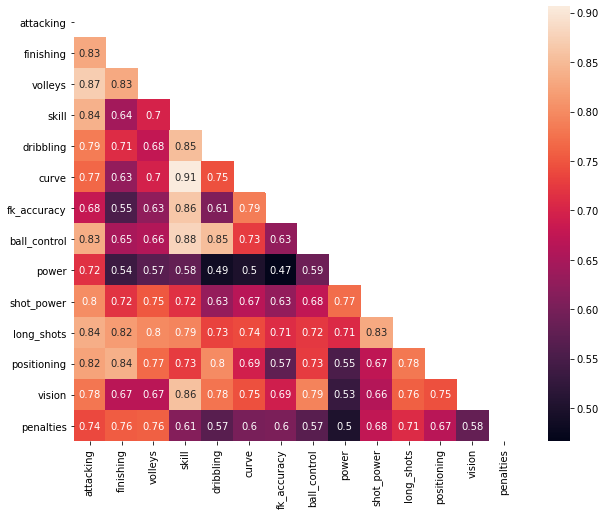

In [26]:
mask = np.zeros_like(df7.corr())

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df7.corr(), mask=mask, annot=True)
plt.show()

In [55]:
for column in df7:
    upper = np.percentile(df7[column],75)
    lower = np.percentile(df7[column],25)
    iqr = upper - lower
    upper_limit = upper + 1.5 * iqr
    lower_limit = lower - 1.5 * iqr
    df8 = df7[(df7[column]>lower_limit) & (df7[column]<upper_limit)]

In [69]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [70]:
X = df8.drop('finishing', axis=1)
y = df8['finishing']

In [64]:
transformer = Normalizer()
transformer.fit(X)

x_normalized = transformer.transform(X)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.3, random_state=42)

In [66]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [67]:
predictions = model.predict(X_test)

In [68]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.7624027435260692, 6.219460700991118, 7.9136389690804)